In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## EDA

In [3]:
# reading the data
df=pd.read_csv('/content/drive/MyDrive/BIA /Capstone Project/health diabetes.csv')

In [4]:
print('Diabetes Data Shape', df.shape)

df.head()

Diabetes Data Shape (774, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,3.822997,120.806202,69.073643,20.497416,79.180879,31.979070,0.470792,33.254522,0.350129
std,3.365749,31.897129,19.288938,15.954880,115.009290,7.855002,0.330272,11.763125,0.477319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.325000,0.244250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,23.000000,32.000000,0.369000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df['Outcome'].value_counts()

0    503
1    271
Name: Outcome, dtype: int64

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.284294,109.878728,68.194831,19.731610,68.381710,30.304771,0.429050,31.141153
1,4.822878,141.088561,70.704797,21.918819,99.225092,35.086716,0.548269,37.177122


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
## Checking the zero values in columns

print('No of Zero values in Glucose  ',df[df['Glucose']==0].shape[0])
print('No of Zero values in BloodPressure  ',df[df['BloodPressure']==0].shape[0])
print('No of Zero values in SkinThickness  ',df[df['SkinThickness']==0].shape[0])
print('No of Zero values in Insulin  ',df[df['Insulin']==0].shape[0])
print('No of Zero values in BMI  ',df[df['BMI']==0].shape[0])

No of Zero values in Glucose   5
No of Zero values in BloodPressure   35
No of Zero values in SkinThickness   230
No of Zero values in Insulin   380
No of Zero values in BMI   11


In [12]:
## Replace No of zero values with mean of that columns

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,3.822997,121.586603,72.197129,26.588379,118.055212,32.433553,0.470792,33.254522,0.350129
std,3.365749,30.371330,12.093996,9.612484,92.907922,6.851387,0.330272,11.763125,0.477319
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.497416,79.180879,27.600000,0.244250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.180879,32.000000,0.369000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Preprocessing

<function matplotlib.pyplot.show(close=None, block=None)>

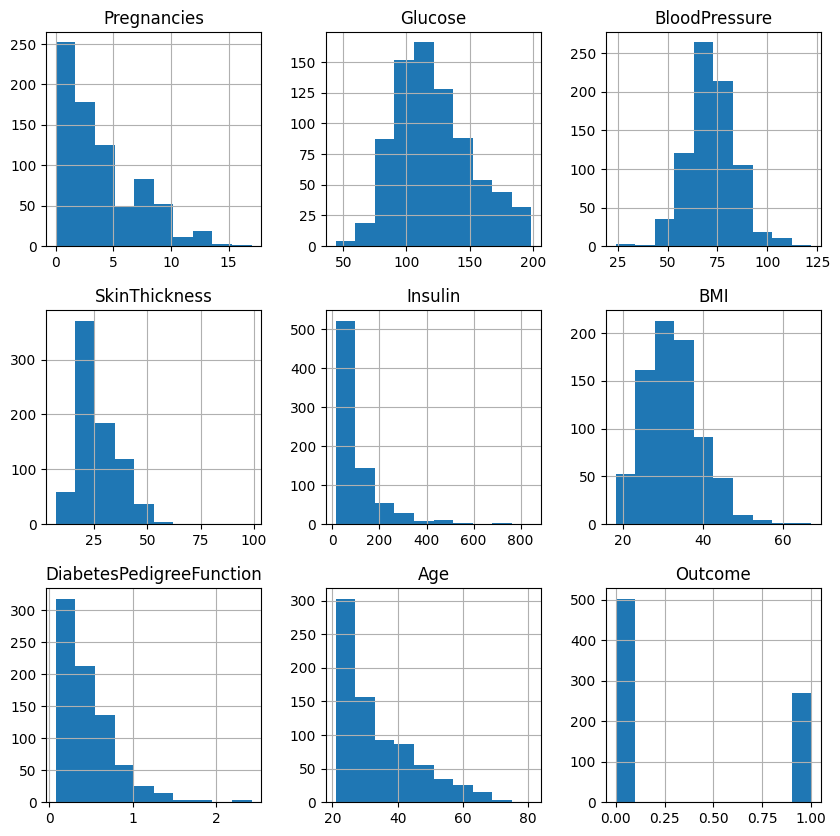

In [14]:
## Histogram plot

df.hist(bins=10,figsize=(10,10))
plt.show

In [15]:
# separating the data and labels
X=df.drop(columns= 'Outcome',axis=1)
Y= df['Outcome']

In [16]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.180879  33.6   
1              1     85.0           66.0      29.000000   79.180879  26.6   
2              8    183.0           64.0      20.497416   79.180879  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
769            1     93.0           70.0      31.000000   79.180879  30.4   
770            1    126.0           60.0      20.497416   79.180879  30.1   
771            1     93.0           70.0      31.000000   79.180879  30.4   
772            1    126.0           60.0      20.497416   79.180879  30.1   
773            1     93.0           70.0      31.000000   79.180879  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [17]:
## Data Standerdization
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
Standerdized_data= scaler.transform(X)

In [21]:
print(Standerdized_data)

[[ 0.64722895  0.87024429 -0.01631025 ...  0.17035991  0.47327386
   1.42447748]
 [-0.83928502 -1.20542174 -0.51274497 ... -0.85199174 -0.36294181
  -0.19178406]
 [ 1.24183453  2.02339208 -0.67822322 ... -1.33395752  0.60961338
  -0.10671766]
 ...
 [-0.83928502 -0.9418451  -0.18178849 ... -0.29700085 -0.47201342
  -0.87231524]
 [-0.83928502  0.14540853 -1.0091797  ... -0.34081592 -0.36900134
   1.16927829]
 [-0.83928502 -0.9418451  -0.18178849 ... -0.29700085 -0.47201342
  -0.87231524]]


In [22]:
X= Standerdized_data
Y= df['Outcome']

In [23]:
## Train Test Split

from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(774, 8) (619, 8) (155, 8)


## Modeling

##**Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression()

In [28]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [29]:
y_pred=lr.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
confusion_matrix(Y_test,y_pred)

array([[92,  9],
       [28, 26]])

In [32]:
accuracy_score(Y_test,y_pred)*100

76.12903225806451

In [33]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       101
           1       0.74      0.48      0.58        54

    accuracy                           0.76       155
   macro avg       0.75      0.70      0.71       155
weighted avg       0.76      0.76      0.75       155



## **Support Vector Machine**

In [34]:
from sklearn import svm


In [52]:
classifier = svm.SVC()

In [53]:
#training the support vector Machine Classifier

classifier.fit(X_train, Y_train)

SVC()

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [55]:
# accuracy score on the training data

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [56]:
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  83.19870759289176


In [57]:
# accuracy score on the test data

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [58]:
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  78.70967741935485


In [59]:
confusion_matrix(Y_test,y_pred)

array([[89, 12],
       [26, 28]])

## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier()

In [61]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [62]:
y_pred=knn.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [64]:
accuracy = accuracy_score(Y_test, y_pred)

In [65]:
print("Accuracy:", accuracy*100)

Accuracy: 75.48387096774194


In [66]:
confusion_matrix(Y_test,y_pred)

array([[89, 12],
       [26, 28]])